In [1]:
import pandas as pd

# Таблица данных для lab5: t, tx1, tx2, tx3, ty
data = [
    {"t": 1, "tx1": 12, "tx2": 2, "tx3": 8,  "ty": 139},
    {"t": 2, "tx1": 17, "tx2": 5, "tx3": 12, "ty": 182},
    {"t": 3, "tx1": 14, "tx2": 6, "tx3": 11, "ty": 164},
    {"t": 4, "tx1": 13, "tx2": 4, "tx3": 9,  "ty": 150},
    {"t": 5, "tx1": 16, "tx2": 3, "tx3": 12, "ty": 176},
    {"t": 6, "tx1": 15, "tx2": 2, "tx3": 9,  "ty": 168},
    {"t": 7, "tx1": 13, "tx2": 6, "tx3": 10, "ty": 173},
    {"t": 8, "tx1": 11, "tx2": 5, "tx3": 13, "ty": 145},
    {"t": 9, "tx1": 15, "tx2": 4, "tx3": 10, "ty": 175},
    {"t": 10, "tx1": 13, "tx2": 6, "tx3": 11, "ty": 157},
    {"t": 11, "tx1": 12, "tx2": 5, "tx3": 14, "ty": 142},
    {"t": 12, "tx1": 15, "tx2": 3, "tx3": 14, "ty": 151},
    {"t": 13, "tx1": 13, "tx2": 2, "tx3": 8,  "ty": 148},
    {"t": 14, "tx1": 16, "tx2": 5, "tx3": 11, "ty": 186},
    {"t": 15, "tx1": 17, "tx2": 5, "tx3": 10, "ty": 201},
    {"t": 16, "tx1": 15, "tx2": 4, "tx3": 13, "ty": 169},
    {"t": 17, "tx1": 11, "tx2": 5, "tx3": 12, "ty": 160},
    {"t": 18, "tx1": 14, "tx2": 4, "tx3": 12, "ty": 151},
    {"t": 19, "tx1": 13, "tx2": 2, "tx3": 14, "ty": 129},
    {"t": 20, "tx1": 15, "tx2": 3, "tx3": 11, "ty": 163},
]

df = pd.DataFrame(data, columns=["t", "tx1", "tx2", "tx3", "ty"])

df


,t,tx1,tx2,tx3,ty
0,1,12,2,8,139
1,2,17,5,12,182
2,3,14,6,11,164
3,4,13,4,9,150
4,5,16,3,12,176
5,6,15,2,9,168
6,7,13,6,10,173
7,8,11,5,13,145
8,9,15,4,10,175
9,10,13,6,11,157


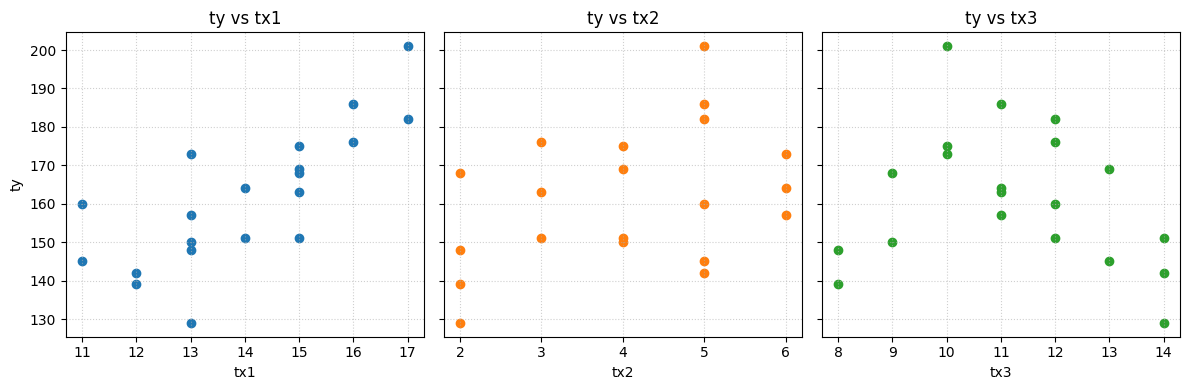

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

axes[0].scatter(df["tx1"], df["ty"], color="tab:blue")
axes[0].set_xlabel("tx1")
axes[0].set_ylabel("ty")
axes[0].set_title("ty vs tx1")
axes[0].grid(True, linestyle=":", alpha=0.6)

axes[1].scatter(df["tx2"], df["ty"], color="tab:orange")
axes[1].set_xlabel("tx2")
axes[1].set_title("ty vs tx2")
axes[1].grid(True, linestyle=":", alpha=0.6)

axes[2].scatter(df["tx3"], df["ty"], color="tab:green")
axes[2].set_xlabel("tx3")
axes[2].set_title("ty vs tx3")
axes[2].grid(True, linestyle=":", alpha=0.6)

plt.tight_layout()
plt.show()


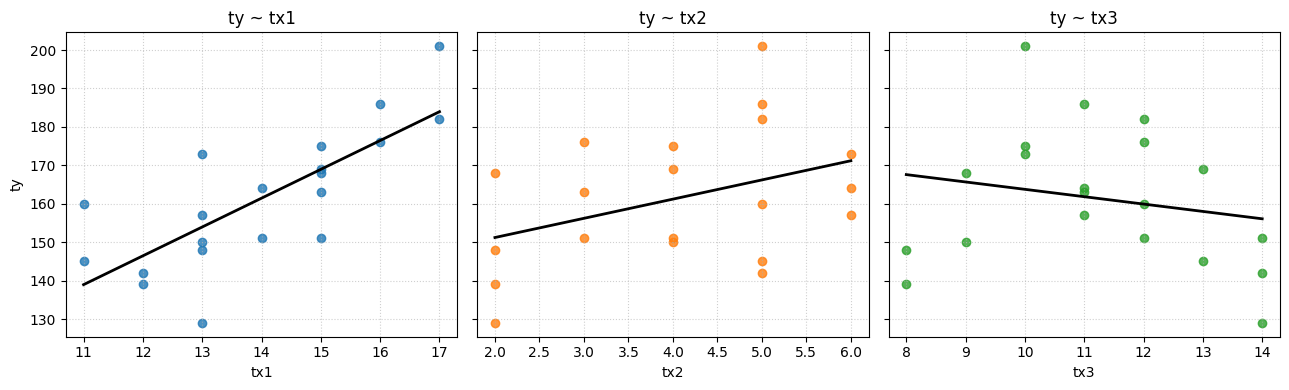

Model ty ~ tx1: a0^ = 56.45 (+), a1^ = 7.50 (+)
Model ty ~ tx2: a0^ = 141.22 (+), a1^ = 4.99 (+)
Model ty ~ tx3: a0^ = 182.92 (+), a1^ = -1.92 (-)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

pairs = [("tx1", "tab:blue"), ("tx2", "tab:orange"), ("tx3", "tab:green")]

fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

for ax, (col, color) in zip(axes, pairs):
    x = df[col].to_numpy(dtype=float)
    y = df["ty"].to_numpy(dtype=float)
    a1, a0 = np.polyfit(x, y, 1)  # slope, intercept

    # Scatter
    ax.scatter(x, y, color=color, alpha=0.8, label=f"ty vs {col}")

    # Trend line over the observed range
    x_grid = np.linspace(x.min(), x.max(), 100)
    y_hat = a0 + a1 * x_grid
    ax.plot(x_grid, y_hat, color="black", linewidth=2, label="linear trend")

    ax.set_xlabel(col)
    ax.grid(True, linestyle=":", alpha=0.6)
    ax.set_title(f"ty ~ {col}")

axes[0].set_ylabel("ty")
plt.tight_layout()
plt.show()

# Печать предварительных оценок параметров для каждой парной модели
for col, _ in pairs:
    x = df[col].to_numpy(dtype=float)
    y = df["ty"].to_numpy(dtype=float)
    a1, a0 = np.polyfit(x, y, 1)
    sign_a1 = "+" if a1 > 0 else ("-" if a1 < 0 else "0")
    sign_a0 = "+" if a0 > 0 else ("-" if a0 < 0 else "0")
    print(f"Model ty ~ {col}: a0^ = {a0:.2f} ({sign_a0}), a1^ = {a1:.2f} ({sign_a1})")


In [4]:
# Множественная регрессия (аналог Excel: Сервис → Анализ данных → Регрессия)
import numpy as np
import pandas as pd

try:
    import statsmodels.api as sm
    use_sm = True
except Exception:
    use_sm = False

X = df[["tx1", "tx2", "tx3"]].astype(float)
y = df["ty"].astype(float)

if use_sm:
    Xc = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, Xc).fit()

    # Regression Statistics (как в Excel)
    R2 = float(model.rsquared)
    adjR2 = float(model.rsquared_adj)
    se = float(np.sqrt(model.mse_resid))
    R = float(np.sqrt(R2))
    n = int(model.nobs)
    k = int(model.df_model)  # число регрессоров (без константы)

    reg_stats = pd.DataFrame({
        "Metric": ["Multiple R", "R Square", "Adjusted R Square", "Standard Error", "Observations"],
        "Value": [R, R2, adjR2, se, n],
    })

    # ANOVA
    df_reg = k
    df_res = int(model.df_resid)
    SSR = float(model.ess)  # explained sum of squares
    SSE = float(model.ssr)  # sum of squared residuals
    MSR = SSR / df_reg
    MSE = SSE / df_res
    F = float(model.fvalue)
    F_sig = float(model.f_pvalue)
    SST = SSR + SSE

    anova = pd.DataFrame([
        {"Source": "Regression", "df": df_reg, "SS": SSR, "MS": MSR, "F": F, "Significance F": F_sig},
        {"Source": "Residual",   "df": df_res, "SS": SSE, "MS": MSE, "F": np.nan, "Significance F": np.nan},
        {"Source": "Total",      "df": df_reg + df_res, "SS": SST, "MS": np.nan, "F": np.nan, "Significance F": np.nan},
    ])

    # Coefficients table
    ci95 = model.conf_int(alpha=0.05)
    coef_tbl = pd.DataFrame({
        "Coefficient": model.params,
        "Standard Error": model.bse,
        "t Stat": model.tvalues,
        "P-value": model.pvalues,
        "Lower 95%": ci95[0],
        "Upper 95%": ci95[1],
    })
    coef_tbl.index.name = "Variable"

    print("Regression Statistics (Excel-style):")
    display(reg_stats.round(4))
    print("\nANOVA:")
    display(anova.round(4))
    print("\nCoefficients:")
    display(coef_tbl.round(4))

    # Знаки коэффициентов для сравнения с предположениями
    signs = {var: ("+" if val > 0 else ("-" if val < 0 else "0")) for var, val in model.params.items()}
    print("\nSigns of coefficients:")
    for var, s in signs.items():
        print(f"  {var}: {s}")
else:
    # Fallback без statsmodels: оценка по формуле МНК и приближённые метрики
    Xc = np.column_stack([np.ones(len(X)), X.to_numpy()])
    beta = np.linalg.lstsq(Xc, y.to_numpy(), rcond=None)[0]
    y_hat = Xc @ beta
    resid = y.to_numpy() - y_hat
    n = len(y)
    k = X.shape[1]
    SSE = float(np.sum(resid**2))
    y_bar = float(np.mean(y))
    SST = float(np.sum((y - y_bar)**2))
    SSR = SST - SSE
    R2 = 1.0 - SSE / SST
    df_res = n - k - 1
    df_reg = k
    MSE = SSE / df_res
    MSR = SSR / df_reg
    F = MSR / MSE if MSE > 0 else np.nan

    reg_stats = pd.DataFrame({
        "Metric": ["Multiple R", "R Square", "Adjusted R Square", "Standard Error", "Observations"],
        "Value": [np.sqrt(R2), R2, 1 - (1-R2)*(n-1)/(n-k-1), np.sqrt(MSE), n],
    })

    anova = pd.DataFrame([
        {"Source": "Regression", "df": df_reg, "SS": SSR, "MS": MSR, "F": F, "Significance F": np.nan},
        {"Source": "Residual",   "df": df_res, "SS": SSE, "MS": MSE, "F": np.nan, "Significance F": np.nan},
        {"Source": "Total",      "df": df_reg + df_res, "SS": SST, "MS": np.nan, "F": np.nan, "Significance F": np.nan},
    ])

    coef_idx = ["const", "tx1", "tx2", "tx3"]
    coef_tbl = pd.DataFrame({
        "Coefficient": beta,
    }, index=coef_idx)

    print("Regression Statistics (Excel-style, fallback):")
    display(reg_stats.round(4))
    print("\nANOVA (fallback):")
    display(anova.round(4))
    print("\nCoefficients (fallback):")
    display(coef_tbl.round(4))

    print("\nSigns of coefficients:")
    for name, b in zip(coef_idx, beta):
        s = "+" if b > 0 else ("-" if b < 0 else "0")
        print(f"  {name}: {s}")


Regression Statistics (Excel-style):


,Metric,Value
0,Multiple R,0.9137
1,R Square,0.8348
2,Adjusted R Square,0.8038
3,Standard Error,7.8608
4,Observations,20.0000



ANOVA:


,Source,df,SS,MS,F,Significance F
0,Regression,3,4996.2658,1665.4219,26.9517,0.0
1,Residual,16,988.6842,61.7928,NaN,NaN
2,Total,19,5984.9500,NaN,NaN,NaN



Coefficients:


,Coefficient,Standard Error,t Stat,P-value,Lower 95%,Upper 95%
Variable,,,,,,
const,59.0740,18.3620,3.2172,0.0054,20.1483,97.9998
tx1,7.6133,0.9995,7.6173,0.0000,5.4945,9.7321
tx2,6.0905,1.3198,4.6146,0.0003,3.2926,8.8884
tx3,-2.5783,0.9783,-2.6355,0.0180,-4.6522,-0.5044



Signs of coefficients:
  const: +
  tx1: +
  tx2: +
  tx3: -


In [5]:
# Критические значения t_{γ, df} для γ ∈ {0.90, 0.95, 0.99}, df = T - M - 1
import pandas as pd

T = len(df)
M = 3  # число независимых переменных: tx1, tx2, tx3
dfree = T - M - 1
levels = [0.90, 0.95, 0.99]

quantiles = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        quantiles[g] = float(student_t.ppf(g, df=dfree))  # односторонние
    source = "scipy"
except Exception:
    # Для df=16 (T=20, M=3): табличные односторонние t-квантили
    if dfree == 16:
        quantiles = {0.90: 1.337, 0.95: 1.746, 0.99: 2.583}
        source = "lookup(df=16)"
    else:
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            quantiles[g] = float(nd.inv_cdf(g))
        source = "normal-approx"

q_df = pd.DataFrame({
    "gamma": levels,
    f"t_gamma (df={dfree})": [quantiles[g] for g in levels],
})

print(f"Computed one-sided Student-t quantiles with df={dfree} using {source}.")
display(q_df.round(4))


Computed one-sided Student-t quantiles with df=16 using scipy.


,gamma,t_gamma (df=16)
0,0.90,1.3368
1,0.95,1.7459
2,0.99,2.5835


In [6]:
# Проверка значимости коэффициентов по t-статистике на уровнях γ ∈ {0.90, 0.95, 0.99}
import numpy as np
import pandas as pd

X = df[["tx1", "tx2", "tx3"]].astype(float)
y = df["ty"].astype(float)
T = len(df)
M = X.shape[1]
df_true = T - M - 1
levels = [0.90, 0.95, 0.99]

# Пытаемся взять t-статистики из statsmodels, иначе считаем вручную
try:
    import statsmodels.api as sm  # noqa: F401
    Xc = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, Xc).fit()
    coef_names = list(model.params.index)
    tvals = model.tvalues.to_numpy()
    use_sm = True
except Exception:
    # OLS вручную: beta = (X'X)^{-1} X'y, Var(beta) = s^2 * (X'X)^{-1}
    Xc = np.column_stack([np.ones(T), X.to_numpy()])
    XtX = Xc.T @ Xc
    XtX_inv = np.linalg.inv(XtX)
    beta = np.linalg.lstsq(Xc, y.to_numpy(), rcond=None)[0]
    resid = y.to_numpy() - Xc @ beta
    s2 = float((resid @ resid) / df_true)
    se = np.sqrt(np.diag(XtX_inv) * s2)
    tvals = beta / se
    coef_names = ["const", *X.columns.tolist()]
    use_sm = False

# Критические значения (двусторонние): t_{(1+γ)/2, df}
crit = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        crit[g] = float(student_t.ppf((1 + g) / 2.0, df=df_true))
    source = "scipy"
except Exception:
    if df_true == 16:  # T=20, M=3
        crit = {0.90: 1.746, 0.95: 2.120, 0.99: 2.921}
        source = "lookup(df=16)"
    else:
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            crit[g] = float(nd.inv_cdf((1 + g) / 2.0))
        source = "normal-approx"

# Таблица решений
rows = []
for name, t in zip(coef_names, tvals):
    row = {"Variable": name, "t_stat": float(t), "|t|": float(abs(t))}
    for g in levels:
        row[f"tcrit_{int(g*100)}"] = crit[g]
        row[f"signif_{int(g*100)}"] = "значим" if abs(t) > crit[g] else "не значим"
    rows.append(row)

res_df = pd.DataFrame(rows)
print(f"df = {df_true}, источник критических t: {source}")
display(res_df.round(4))


df = 16, источник критических t: scipy


,Variable,t_stat,|t|,tcrit_90,signif_90,tcrit_95,signif_95,tcrit_99,signif_99
0,const,3.2172,3.2172,1.7459,значим,2.1199,значим,2.9208,значим
1,tx1,7.6173,7.6173,1.7459,значим,2.1199,значим,2.9208,значим
2,tx2,4.6146,4.6146,1.7459,значим,2.1199,значим,2.9208,значим
3,tx3,-2.6355,2.6355,1.7459,значим,2.1199,значим,2.9208,не значим


In [7]:
# Доверительные интервалы для коэффициентов модели (γ ∈ {0.90, 0.95, 0.99})
import numpy as np
import pandas as pd

X = df[["tx1", "tx2", "tx3"]].astype(float)
y = df["ty"].astype(float)
T = len(df)
M = X.shape[1]
df_true = T - M - 1
levels = [0.90, 0.95, 0.99]

# Оценки коэффициентов и их стандартные ошибки
try:
    import statsmodels.api as sm
    Xc = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, Xc).fit()
    coefs = model.params.to_numpy()
    ses = model.bse.to_numpy()
    names = list(model.params.index)
    s2 = float(model.mse_resid)
    source_fit = "statsmodels"
except Exception:
    Xc = np.column_stack([np.ones(T), X.to_numpy()])
    names = ["const", *X.columns.tolist()]
    XtX = Xc.T @ Xc
    XtX_inv = np.linalg.inv(XtX)
    coefs = np.linalg.lstsq(Xc, y.to_numpy(), rcond=None)[0]
    resid = y.to_numpy() - Xc @ coefs
    s2 = float((resid @ resid) / df_true)
    ses = np.sqrt(np.diag(XtX_inv) * s2)
    source_fit = "manual"

# Критические значения t (двусторонние): t_{(1+γ)/2, df}
crit = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        crit[g] = float(student_t.ppf((1 + g) / 2.0, df=df_true))
    source_t = "scipy"
except Exception:
    if df_true == 16:
        crit = {0.90: 1.746, 0.95: 2.120, 0.99: 2.921}
        source_t = "lookup(df=16)"
    else:
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            crit[g] = float(nd.inv_cdf((1 + g) / 2.0))
        source_t = "normal-approx"

rows = []
for name, b, se in zip(names, coefs, ses):
    row = {"Variable": name, "coef": float(b), "se": float(se)}
    for g in levels:
        c = crit[g]
        row[f"CI{int(g*100)}_lower"] = float(b - c * se)
        row[f"CI{int(g*100)}_upper"] = float(b + c * se)
    rows.append(row)

ci_df = pd.DataFrame(rows)
print(f"df = {df_true}, fit={source_fit}, t-crit source={source_t}")
display(ci_df.round(4))


df = 16, fit=statsmodels, t-crit source=scipy


,Variable,coef,se,CI90_lower,CI90_upper,CI95_lower,CI95_upper,CI99_lower,CI99_upper
0,const,59.0740,18.3620,27.0161,91.1320,20.1483,97.9998,5.4425,112.7056
1,tx1,7.6133,0.9995,5.8683,9.3583,5.4945,9.7321,4.6941,10.5325
2,tx2,6.0905,1.3198,3.7862,8.3947,3.2926,8.8884,2.2356,9.9454
3,tx3,-2.5783,0.9783,-4.2863,-0.8703,-4.6522,-0.5044,-5.4356,0.2791


In [8]:
# Вывод об адекватности по Adjusted R^2 (Нормированный R-квадрат)
import numpy as np
import pandas as pd

X = df[["tx1", "tx2", "tx3"]].astype(float)
y = df["ty"].astype(float)
T = len(df)
M = X.shape[1]

try:
    import statsmodels.api as sm
    Xc = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, Xc).fit()
    adjR2 = float(model.rsquared_adj)
    source = "statsmodels"
except Exception:
    # Ручной расчёт Adjusted R^2
    Xc = np.column_stack([np.ones(T), X.to_numpy()])
    beta = np.linalg.lstsq(Xc, y.to_numpy(), rcond=None)[0]
    y_hat = Xc @ beta
    resid = y.to_numpy() - y_hat
    SSE = float(np.sum(resid**2))
    y_bar = float(np.mean(y))
    SST = float(np.sum((y - y_bar)**2))
    R2 = 1.0 - SSE / SST
    adjR2 = 1.0 - (1.0 - R2) * (T - 1) / (T - M - 1)
    source = "manual"

if adjR2 >= 0.70:
    verdict = "высокая объясняющая способность (модель адекватна)"
elif adjR2 >= 0.50:
    verdict = "умеренная объясняющая способность"
else:
    verdict = "низкая объясняющая способность"

print(f"Adjusted R^2 = {adjR2:.4f} (source={source})")
print(f"Предварительное заключение: {verdict}")


Adjusted R^2 = 0.8038 (source=statsmodels)
Предварительное заключение: высокая объясняющая способность (модель адекватна)


In [9]:
# Критические значения Фишера F_{γ; (M, T−M−1)} для γ ∈ {0.90, 0.95, 0.99}
import pandas as pd

T = len(df)
M = 3  # число независимых переменных (tx1, tx2, tx3)
df1 = M
df2 = T - M - 1
levels = [0.90, 0.95, 0.99]

quantiles = {}
try:
    from scipy.stats import f as fisher_f
    for g in levels:
        quantiles[g] = float(fisher_f.ppf(g, dfn=df1, dfd=df2))
    source = "scipy"
except Exception:
    # Табличные значения для df1=3, df2=16 (T=20, M=3). При иных df используйте scipy или таблицы.
    if df1 == 3 and df2 == 16:
        quantiles = {0.90: 2.457, 0.95: 3.238, 0.99: 5.292}
        source = "lookup(df1=3,df2=16)"
    else:
        source = "unavailable"

if quantiles:
    q_df = pd.DataFrame({
        "gamma": levels,
        f"F_gamma (df1={df1}, df2={df2})": [quantiles[g] for g in levels],
    })
    print(f"Computed Fisher F upper-tail quantiles with df1={df1}, df2={df2} using {source}.")
    display(q_df.round(4))
else:
    print(f"Не удалось вычислить квантили F; df1={df1}, df2={df2}. Установите scipy или используйте таблицы.")


Computed Fisher F upper-tail quantiles with df1=3, df2=16 using scipy.


,gamma,"F_gamma (df1=3, df2=16)"
0,0.90,2.4618
1,0.95,3.2389
2,0.99,5.2922


In [10]:
# Проверка значимости R^2 по F-наблюдаемому и критическим значениям F_{γ; (M, T−M−1)}
import numpy as np
import pandas as pd

X = df[["tx1", "tx2", "tx3"]].astype(float)
y = df["ty"].astype(float)
T = len(df)
M = X.shape[1]
df1, df2 = M, T - M - 1

# F-наблюдаемое: из statsmodels, иначе по формуле через R^2
try:
    import statsmodels.api as sm
    Xc = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, Xc).fit()
    R2 = float(model.rsquared)
    F_obs = float(model.fvalue)
    source_fit = "statsmodels"
except Exception:
    Xc = np.column_stack([np.ones(T), X.to_numpy()])
    beta = np.linalg.lstsq(Xc, y.to_numpy(), rcond=None)[0]
    y_hat = Xc @ beta
    resid = y.to_numpy() - y_hat
    SSE = float(np.sum(resid**2))
    y_bar = float(np.mean(y))
    SST = float(np.sum((y - y_bar)**2))
    R2 = 1.0 - SSE / SST
    F_obs = (R2 / (1.0 - R2)) * (df2 / df1) if (1.0 - R2) > 0 else np.inf
    source_fit = "manual"

# Критические значения F (верхние квантили)
levels = [0.90, 0.95, 0.99]
crit = {}
try:
    from scipy.stats import f as fisher_f
    for g in levels:
        crit[g] = float(fisher_f.ppf(g, dfn=df1, dfd=df2))
    source_F = "scipy"
except Exception:
    if df1 == 3 and df2 == 16:
        crit = {0.90: 2.457, 0.95: 3.238, 0.99: 5.292}
        source_F = "lookup(df1=3,df2=16)"
    else:
        source_F = "unavailable"

rows = []
for g in levels:
    fcrit = crit.get(g, float('nan'))
    decision = "значим (отклоняем H0: R^2=0)" if np.isfinite(fcrit) and F_obs > fcrit else "незначим (не отклоняем H0)"
    rows.append({"gamma": g, "F_obs": F_obs, "F_crit": fcrit, "decision": decision})

print(f"df1={df1}, df2={df2}, R^2={R2:.4f}, F_obs={F_obs:.4f}  [fit={source_fit}, F crit source={source_F}]")
display(pd.DataFrame(rows).round(4))


df1=3, df2=16, R^2=0.8348, F_obs=26.9517  [fit=statsmodels, F crit source=scipy]


,gamma,F_obs,F_crit,decision
0,0.90,26.9517,2.4618,значим (отклоняем H0: R^2=0)
1,0.95,26.9517,3.2389,значим (отклоняем H0: R^2=0)
2,0.99,26.9517,5.2922,значим (отклоняем H0: R^2=0)


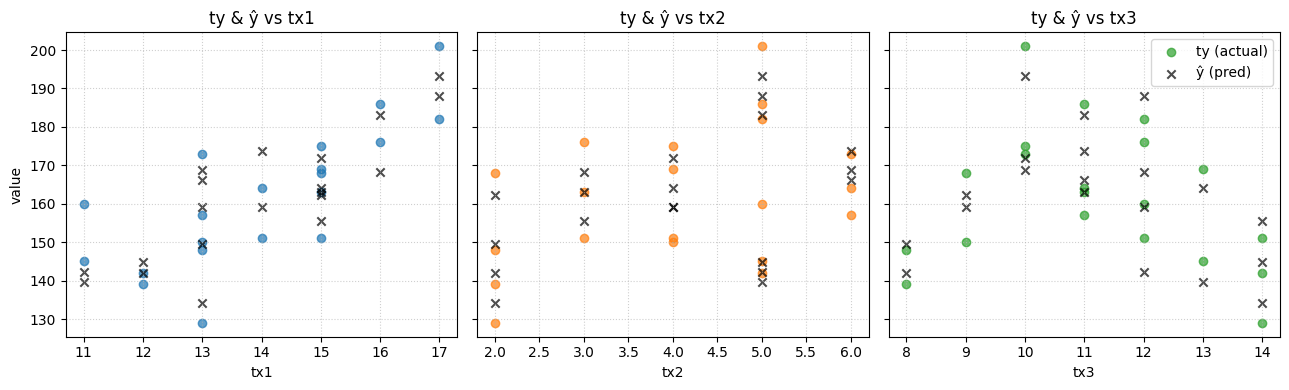

In [11]:
# Фактические ty и предсказанные ŷ в зависимости от tx1, tx2, tx3
import numpy as np
import matplotlib.pyplot as plt

X = df[["tx1", "tx2", "tx3"]].astype(float)
y = df["ty"].astype(float)
T = len(df)

# Оценим модель и получим ŷ
try:
    import statsmodels.api as sm
    Xc = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, Xc).fit()
    y_hat = model.fittedvalues.to_numpy()
except Exception:
    Xc = np.column_stack([np.ones(T), X.to_numpy()])
    beta = np.linalg.lstsq(Xc, y.to_numpy(), rcond=None)[0]
    y_hat = (Xc @ beta)

disp_df = df.copy()
disp_df["y_hat"] = y_hat

pairs = [("tx1", "tab:blue"), ("tx2", "tab:orange"), ("tx3", "tab:green")]
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

for ax, (col, color) in zip(axes, pairs):
    ax.scatter(disp_df[col], disp_df["ty"], color=color, alpha=0.7, label="ty (actual)")
    ax.scatter(disp_df[col], disp_df["y_hat"], color="black", alpha=0.7, marker="x", label="ŷ (pred)")
    ax.set_xlabel(col)
    ax.grid(True, linestyle=":", alpha=0.6)
    ax.set_title(f"ty & ŷ vs {col}")

axes[0].set_ylabel("value")
axes[-1].legend(loc="best")
plt.tight_layout()
plt.show()


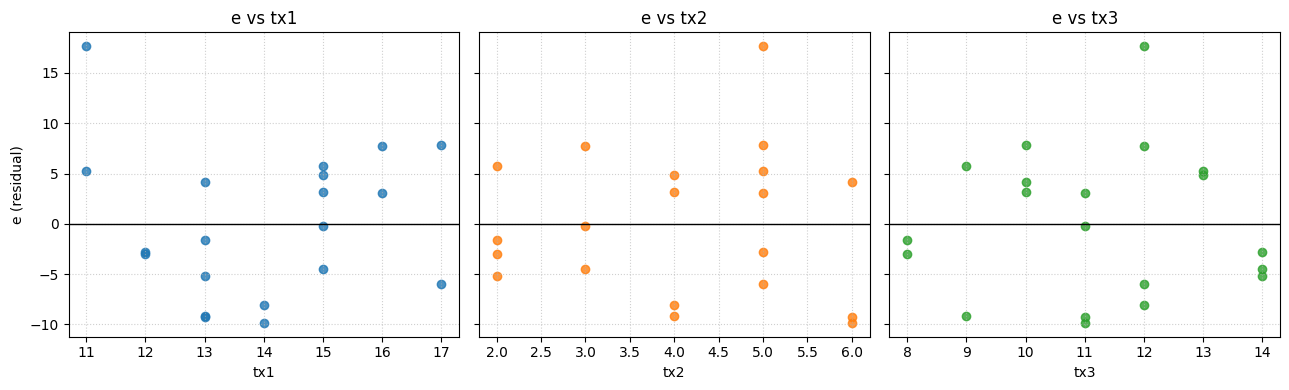

Shapiro–Wilk: W=0.944, p-value=0.285
Вывод: нет оснований отвергать нормальность остатков (p>0.05).


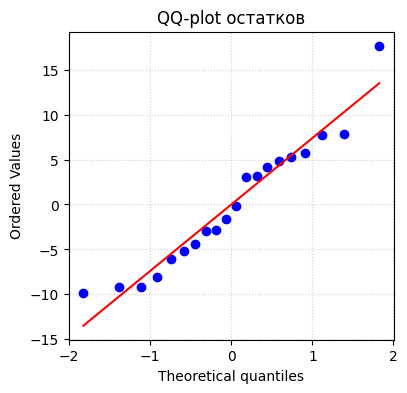

In [12]:
# Остатки модели: e vs tx1, tx2, tx3 + краткая проверка распределения
import numpy as np
import matplotlib.pyplot as plt

X = df[["tx1", "tx2", "tx3"]].astype(float)
y = df["ty"].astype(float)
T = len(df)

# Оценим модель и найдём остатки
e = None
try:
    import statsmodels.api as sm
    Xc = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, Xc).fit()
    y_hat = model.fittedvalues.to_numpy()
    e = (y.to_numpy() - y_hat)
    source = "statsmodels"
except Exception:
    Xc = np.column_stack([np.ones(T), X.to_numpy()])
    beta = np.linalg.lstsq(Xc, y.to_numpy(), rcond=None)[0]
    y_hat = Xc @ beta
    e = (y.to_numpy() - y_hat)
    source = "manual"

fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
for ax, col, color in zip(axes, ["tx1", "tx2", "tx3"], ["tab:blue", "tab:orange", "tab:green"]):
    ax.scatter(df[col], e, color=color, alpha=0.8)
    ax.axhline(0, color="black", linewidth=1)
    ax.set_xlabel(col)
    ax.set_title(f"e vs {col}")
    ax.grid(True, linestyle=":", alpha=0.6)
axes[0].set_ylabel("e (residual)")
plt.tight_layout()
plt.show()

# Краткая проверка нормальности остатков (если доступен scipy)
try:
    from scipy.stats import shapiro, probplot
    stat, pval = shapiro(e)
    print(f"Shapiro–Wilk: W={stat:.3f}, p-value={pval:.3f}")
    if pval > 0.05:
        print("Вывод: нет оснований отвергать нормальность остатков (p>0.05).")
    else:
        print("Вывод: остатки отклоняются от нормального распределения (p<=0.05).")
    # QQ-plot для визуальной проверки
    fig = plt.figure(figsize=(4.2, 4))
    probplot(e, dist="norm", plot=plt)
    plt.title("QQ-plot остатков")
    plt.grid(True, linestyle=":", alpha=0.6)
    plt.show()
except Exception:
    mu, sd = float(np.mean(e)), float(np.std(e, ddof=1))
    print(f"Среднее остатков ≈ {mu:.3f}, s ≈ {sd:.3f}")
    print("Для проверки нормальности установите scipy (shapiro, QQ-plot).")
